# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pathlib

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()
# if your env is in home:
#home=pathlib.Path.home() /".env"
#load_dotenv(dotenv_path=home)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_btc_value=0.00
my_eth=5.3
my_eth_value=0.00

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
import json
btc_data={}
btc_response_data = requests.get(btc_url).json()
#Beatuify response data with json.dumps function: 
#btc_data=json.dumps(btc_response_data, indent=4)
#Get the current BTC price from response data:
btc_price= btc_response_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
#Beatuify response data with json.dumps function: 
#json.dumps(eth_response_data,indent=4)
#Get the current ETH price from response data:
eth_price= eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

61257.0
3887.98
The current value of your 1.2 BTC is $73508.40
The current value of your 5.3 ETH is $20606.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key=os.getenv("ALPACA_API_KEY")
api_secrete_key =os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca=tradeapi.REST(api_key,
                     api_secrete_key, 
                     api_version="v2")

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-10-13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_portfolio.head(30)

# Preview DataFrame
# YOUR CODE HERE!

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-10-13 00:00:00-04:00  114.43  114.64  114.415  114.61  5301180  434.71   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-13 00:00:00-04:00  436.05  431.54  435.13  63943229

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $435.13


In [10]:
# Compute the current value of shares
my_spy_value = agg_close_price * my_spy
my_agg_value = spy_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5730.50
The current value of your 200 AGG shares is $87026.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
#set amount data
amount_data ={
    "amount" : [19385.986877, 40616.500000]

}
#set the row value
rows = ["crypto", "shares"]
# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=rows)

# Display savings DataFrame
display(df_savings)

,amount
crypto,19385.986877
shares,40616.500000


<AxesSubplot:title={'center':'Health Savings Composition'}, ylabel='amount'>

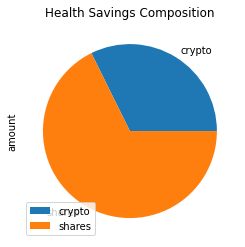

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Health Savings Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings["amount"][0]) + float(df_savings["amount"][1])
# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You are reaching this financial goal.")
else:
    print("You are $", emergency_fund-total_savings, "away from reaching this financial goal.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the stock tickers
tickers = ["SPY", "AGG"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Sylvia\Documents\MySchool\FinTech_Bootcamp\uofm-stp-virt-fin-09-2021-u-c\uofm-stp-virt-fin-09-2021-u-c\material\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993369,1.012193,1.012309,0.993065,0.974342,0.999538,0.996420,1.000754,0.993772,1.010752,...,0.998245,0.991861,0.993416,0.999617,0.990679,1.008804,0.996213,1.004904,0.981006,0.996844
2,0.990540,1.024082,1.011603,0.987006,0.962962,1.000105,0.994739,1.019635,1.007671,1.012063,...,1.001875,0.991134,0.996883,0.998290,0.992303,1.016754,1.005689,1.009682,0.992075,1.003161
3,0.991489,1.026364,1.015122,0.985929,0.972695,0.993611,0.994321,0.995233,1.009790,1.014026,...,0.997588,0.989825,0.999386,0.995551,1.003907,1.015282,1.015519,1.009118,0.988026,1.004472
4,0.986559,1.024650,1.016406,0.981791,0.981254,0.993248,1.008780,1.005517,1.014402,1.011815,...,1.013572,0.992738,0.995740,0.984657,0.999599,1.014908,1.009832,1.008733,0.987336,0.995659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.528855,15.181129,7.411497,60.801952,6.273001,14.220400,17.985082,11.494462,12.969696,44.995059,...,18.409095,6.910031,14.503292,17.689658,19.122928,10.725985,34.667897,15.935892,4.581648,13.190182
7557,11.479706,15.174918,7.432478,60.154879,6.164094,14.265109,18.244393,11.320409,13.043862,45.283251,...,18.368849,6.841673,14.342022,17.623361,18.992529,10.774433,34.332156,16.088317,4.654539,13.117225
7558,11.456744,15.115483,7.448643,60.677518,6.114792,14.295958,18.198336,11.233701,13.124494,45.080271,...,18.597270,6.904205,14.305409,17.511970,18.904068,10.907438,34.335921,16.186432,4.652366,13.173794
7559,11.338626,15.048040,7.419092,60.808235,6.136695,14.372315,18.229130,11.135946,13.248537,45.605831,...,18.293119,6.832737,14.288166,17.385777,18.638584,10.956307,34.078873,16.251663,4.659496,13.249495


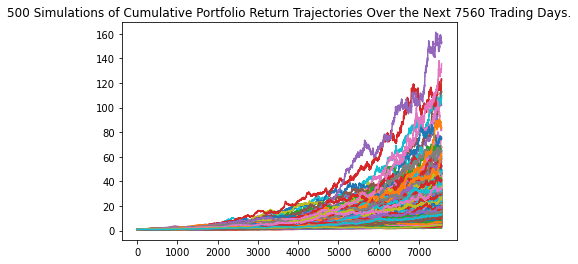

In [19]:
# Plot simulation outcomes
line_plot=MC_30year.plot_simulation()
# Save the plot for future usage
#line_plot.get_figure().savefig("MC_30year.png", bbox_inches="tight")

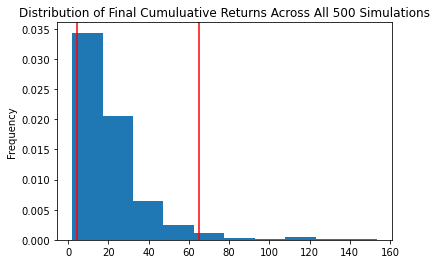

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl= MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.549742
std              17.858226
min               1.972378
25%              10.741369
50%              16.524571
75%              26.765002
max             153.228401
95% CI Lower      4.147415
95% CI Upper     64.990364
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82948.3 and $1299807.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_more = round(tbl[8]*initial_investment,2)
ci_upper_more = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_more} and ${ci_upper_more}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124422.44 and $1949710.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Sylvia\Documents\MySchool\FinTech_Bootcamp\uofm-stp-virt-fin-09-2021-u-c\uofm-stp-virt-fin-09-2021-u-c\material\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006635,0.994607,0.991374,0.989656,0.995607,0.994594,0.997328,0.995593,1.002064,0.994641,...,1.008126,1.003941,0.999804,1.001405,0.997724,0.994896,0.990838,0.990497,1.000105,0.997822
2,0.998240,0.998589,0.992475,0.986030,0.995890,0.978388,0.988063,0.994655,1.006125,1.003150,...,0.989319,0.993604,0.988849,1.011220,0.985931,0.998430,0.993009,0.981691,1.009799,1.007605
3,1.006259,1.003960,0.987460,0.991738,0.999814,0.989463,0.973637,0.990165,1.000704,1.001862,...,0.983254,0.994356,0.987818,1.014211,0.973246,0.992268,0.989456,0.970300,1.003625,0.993428
4,1.018628,1.012122,0.984383,1.003650,0.997939,0.985652,0.972636,0.982269,1.003888,0.997956,...,0.985168,1.004480,0.991614,1.018380,0.985179,0.999078,0.999710,0.957620,1.000469,0.995443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.672183,2.172659,2.093331,1.359961,2.289508,2.485241,1.641205,0.955428,1.973792,2.020914,...,1.210480,1.421324,1.557273,1.384331,1.589186,2.424489,2.716808,2.054888,1.279020,0.902977
1257,1.668268,2.152728,2.079556,1.356985,2.285831,2.482475,1.668342,0.964822,1.987279,2.014448,...,1.212430,1.437409,1.532773,1.346371,1.590417,2.440679,2.720912,2.060299,1.280015,0.896503
1258,1.666481,2.132061,2.092724,1.366198,2.317635,2.501000,1.674385,0.971547,2.012134,2.008671,...,1.228371,1.421948,1.520435,1.350942,1.584961,2.423631,2.703134,2.077079,1.295606,0.896433
1259,1.681842,2.147585,2.113321,1.349547,2.314285,2.479534,1.695236,0.964877,2.013650,2.024881,...,1.233418,1.429517,1.488983,1.348449,1.603472,2.419570,2.696898,2.125947,1.297379,0.910162


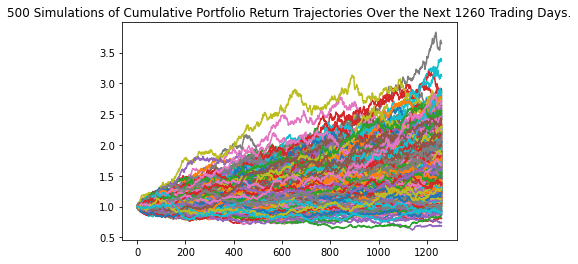

In [26]:
# Plot simulation outcomes
fiveyear_plotline = MC_fiveyear.plot_simulation()

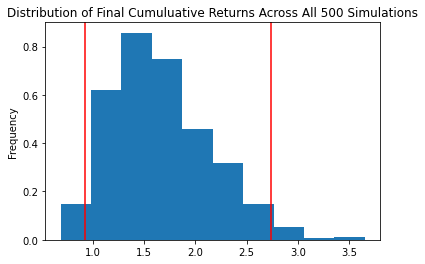

In [27]:
# Plot probability distribution and confidence intervals
fiveyear_dis_line = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl= MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_tbl)

count           500.000000
mean              1.662824
std               0.477528
min               0.688090
25%               1.307457
50%               1.606107
75%               1.954948
max               3.651083
95% CI Lower      0.925228
95% CI Upper      2.734442
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5year = round(fiveyear_tbl[8]*initial_investment, 2)
ci_upper_5year = round(fiveyear_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5year} and ${ci_upper_5year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55513.67 and $164066.5


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Sylvia\Documents\MySchool\FinTech_Bootcamp\uofm-stp-virt-fin-09-2021-u-c\uofm-stp-virt-fin-09-2021-u-c\material\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001439,0.989671,1.002136,1.005094,1.010645,1.003814,0.998252,1.002668,0.994158,1.006050,...,0.995586,1.003171,0.992905,0.984225,0.999752,1.003253,1.007449,1.020210,0.988415,1.004208
2,1.006791,0.984727,0.996655,1.003133,1.011837,1.016908,0.997013,0.991494,1.001136,1.015313,...,1.000993,0.992241,0.997957,0.981539,1.011983,0.998075,1.014719,1.040244,0.991967,1.004996
3,1.004254,0.976488,1.002721,1.014109,1.015077,1.011991,0.993788,0.971302,1.010560,1.013862,...,0.997189,0.991185,1.000038,0.982965,1.006939,0.998650,1.027270,1.046578,0.976985,1.006240
4,0.996798,0.970726,1.001820,1.009719,1.018345,1.006422,0.989388,0.963883,1.007716,1.016978,...,1.000851,0.977507,1.008785,0.996672,1.004750,1.017090,1.013386,1.050295,0.980295,1.017700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.576593,1.455256,2.561161,2.490930,3.846509,4.082004,2.262781,3.034741,2.089251,2.320594,...,3.697828,1.751459,2.356470,1.695772,3.408008,2.789335,2.010023,2.394382,2.217248,2.012793
2517,3.549204,1.470570,2.582286,2.514933,3.880560,4.074591,2.277130,3.033392,2.075152,2.313350,...,3.724813,1.737231,2.357609,1.696536,3.456128,2.807567,2.004098,2.433519,2.231466,2.040776
2518,3.563256,1.481345,2.584338,2.493830,3.916890,4.090467,2.291506,3.050954,2.101704,2.323110,...,3.729066,1.705858,2.357909,1.698868,3.476349,2.781878,2.028335,2.407112,2.208087,2.033432
2519,3.524497,1.477706,2.584735,2.491445,3.867259,4.146675,2.277798,3.001176,2.085962,2.327850,...,3.775328,1.687606,2.340736,1.702743,3.445733,2.782905,2.042388,2.446816,2.207863,2.013506


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

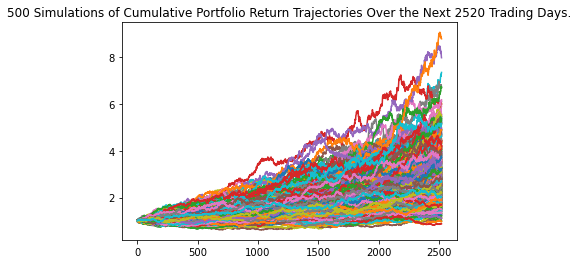

In [32]:
# Plot simulation outcomes
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

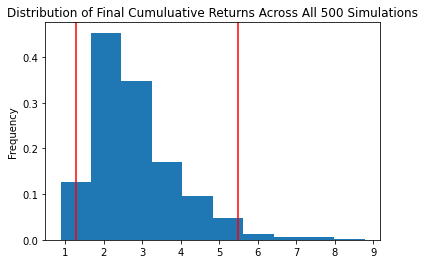

In [36]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tenyear_tbl)

count           500.000000
mean              2.806960
std               1.119383
min               0.879735
25%               2.046561
50%               2.575157
75%               3.287663
max               8.779770
95% CI Lower      1.273639
95% CI Upper      5.494906
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyear_tbl[8]*initial_investment, 2)
ci_upper_ten = round(tenyear_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76418.37 and $329694.39
